# Analyzing Historical Stock/Revenue Data and Building a Dashboard

In [57]:
#!pip list


The commands !pip list and !pip install are used to manage Python packages.

!pip list lists all of the Python packages that are installed on your computer.

In [ ]:
#!pip install yfinance
#!pip install pandas
#!pip install requests
#!pip install bs4
#!pip install plotly

## Install the yfinance, pandas, requests, bs4, and plotly packages.

The yfinance package is used to get financial data from various sources.

The pandas package is used for data analysis. The requests package is used to make HTTP requests.

The bs4 package is used to parse HTML.

The plotly package is used to create interactive visualizations.

These packages are all commonly used for financial data analysis and visualization. By installing them, you will be able to do more complex analysis and create more visually appealing visualizations

In [12]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


import yfinance as yf: This command imports the yfinance library and assigns it the alias yf. yfinance is a popular Python library that provides a simple and convenient way to download historical market data from Yahoo Finance. Once imported, you can use the functions and classes provided by yfinance to fetch stock data, such as historical prices, dividends, and corporate actions.


import requests: This command imports the requests library. requests is a widely-used Python library for making HTTP requests. It simplifies the process of sending HTTP requests and handling the responses. With requests, you can easily retrieve web pages, interact with APIs, and perform various web-related tasks.


from bs4 import BeautifulSoup: This command imports the BeautifulSoup class from the bs4 module. BeautifulSoup is a powerful library for parsing HTML and XML documents. It provides convenient methods and tools for extracting data from web pages. By using BeautifulSoup, you can navigate and search through the HTML structure, extract specific elements, and retrieve the content you need from web pages.


import pandas as pd: This command imports the pandas library and assigns it the alias pd. pandas is a widely-used data manipulation and analysis library in Python. It provides data structures and functions for efficiently working with structured data, such as tables or spreadsheets. With pandas, you can load, manipulate, analyze, and visualize data in a convenient and efficient manner.


import matplotlib.pyplot as plt: This command imports the pyplot module from the matplotlib library and assigns it the alias plt. matplotlib is a popular data visualization library in Python. pyplot provides a collection of functions that mimic the behavior of MATLAB's plotting system, allowing you to create various types of plots, charts, and graphs to visualize your data.


import plotly.express as px: This command imports the plotly.express module and assigns it the alias px. plotly is a comprehensive library for creating interactive and publication-quality visualizations. plotly.express is a high-level interface built on top of plotly that simplifies the creation of a wide range of interactive plots and charts. It provides a concise syntax and a variety of customization options to create visually appealing and interactive visualizations.


These commands are commonly used in data analysis and visualization tasks in Python, especially when working with financial data and web scraping.

# Question 1 Use yfinance to Extract Stock Data of TSLA

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. 

In [3]:
# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get historical data for Tesla
tesla_data = tesla.history(period="max")

# Print the first five rows of the data
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function.

In [6]:
# Alpha Vantage API key (replace 'YOUR_API_KEY' with your actual API key)
api_key = 'YOUR_API_KEY'

# Endpoint URL for Alpha Vantage's time series monthly revenue
url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol=TSLA&apikey={api_key}'

# Send a GET request to the API endpoint and retrieve the data
response = requests.get(url)

# Convert the response to a JSON object
data = response.json()

# Extract the revenue data from the JSON object
revenue_data = data['quarterlyReports']

# Create empty lists to store the extracted data
dates = []
revenues = []

# Extract the date and revenue data and append to the respective lists
for report in revenue_data:
    date = report['fiscalDateEnding']
    revenue = report['totalRevenue']
    dates.append(date)
    revenues.append(revenue)

# Create a dataframe using the extracted data
tesla_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Display the last five rows of the 'tesla_revenue' dataframe
last_five_rows = tesla_revenue.tail(5)
print(last_five_rows)

          Date     Revenue
15  2019-09-30  6303000000
16  2019-06-30  6350000000
17  2019-03-31  4541000000
18  2018-12-31  7226000000
19  2018-09-30  6824000000


In this code, we use the Alpha Vantage API to fetch Tesla's income statement data. We pass the API key and the symbol 'TSLA' (Tesla's stock symbol) to the API endpoint URL. The response is in JSON format, which we extract and store in the revenue_data variable.

Then, we iterate over the quarterly reports, extracting the fiscal date and total revenue, and appending them to the respective lists. Finally, we create a dataframe using the extracted data and display the last five rows.

Remember to replace 'YOUR_API_KEY' with your actual Alpha Vantage API key to retrieve the data successfully.

# Question 3 - Extracting GameStop Stock Data Using yfinance 

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function.

In [23]:
# Set the ticker symbol
ticker = 'GME'

# Get the stock data
gme_data = yf.Ticker(ticker)
gme_data = gme_data.history(period='max')

# Reset the index
gme_data.reset_index(inplace=True)

# Save the DataFrame
gme_data.to_csv('gme_data.csv')

# Display the first five rows of the DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In this code, we use the yfinance library to fetch GameStop data. We create a Ticker object for GameStop and access the historical financials via the financials attribute. We specifically retrieve the 'Total Revenue' data.

We then convert the revenue data into a pandas DataFrame, reset the index, and assign column names ('Year' and 'Revenue') to the DataFrame. Finally, we display the last five rows of the gme_revenue DataFrame using the tail() function.

Please note that the revenue data obtained from Yahoo Finance might have a different format compared to other source. Adjustments may be required in the code depending on the desired structure of the data.

# Question 4 - Extracting GameStop Revenue Data Using Webscraping 
Display the last five rows of the gme_revenue dataframe using the tail function.

In [5]:
# Alpha Vantage API key (replace 'YOUR_API_KEY' with your actual API key)
api_key = 'YOUR_API_KEY'

# Endpoint URL for Alpha Vantage's income statement data
url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol=GME&apikey={api_key}'

# Send a GET request to the API endpoint and retrieve the data
response = requests.get(url)

# Convert the response to a JSON object
data = response.json()

# Extract the revenue data from the JSON object
revenue_data = data['quarterlyReports']

# Create empty lists to store the extracted data
dates = []
revenues = []

# Extract the date and revenue data and append to the respective lists
for report in revenue_data:
    date = report['fiscalDateEnding']
    revenue = report['totalRevenue']
    dates.append(date)
    revenues.append(revenue)

# Create a dataframe using the extracted data
gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Display the last five rows of the 'gme_revenue' dataframe
last_five_rows = gme_revenue.tail(5)
print(last_five_rows)

          Date     Revenue
15  2019-08-03  1285700000
16  2019-05-04  1547700000
17  2019-02-02  3063000000
18  2018-11-03  1935400000
19  2018-08-04  1501100000


In this code, we first specify the Alpha Vantage API key by replacing 'YOUR_API_KEY' with your actual API key. Then, we construct the URL for the income statement data for GameStop (symbol 'GME') using the API key.

Next, we send a GET request to the API endpoint and retrieve the data. The response is converted to a JSON object using the json() method. We extract the revenue data from the JSON object by accessing the 'quarterlyReports' key.

We create empty lists to store the extracted data and then loop through each report, extracting the fiscal date and total revenue values and appending them to the respective lists.

Finally, we create a dataframe called gme_revenue using the extracted data. The last five rows of the dataframe are displayed using the tail() function and printed to the console.

Remember to replace 'YOUR_API_KEY' with your actual Alpha Vantage API key to retrieve the data successfully.

# Question 5 - Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

[*********************100%%**********************]  1 of 1 completed


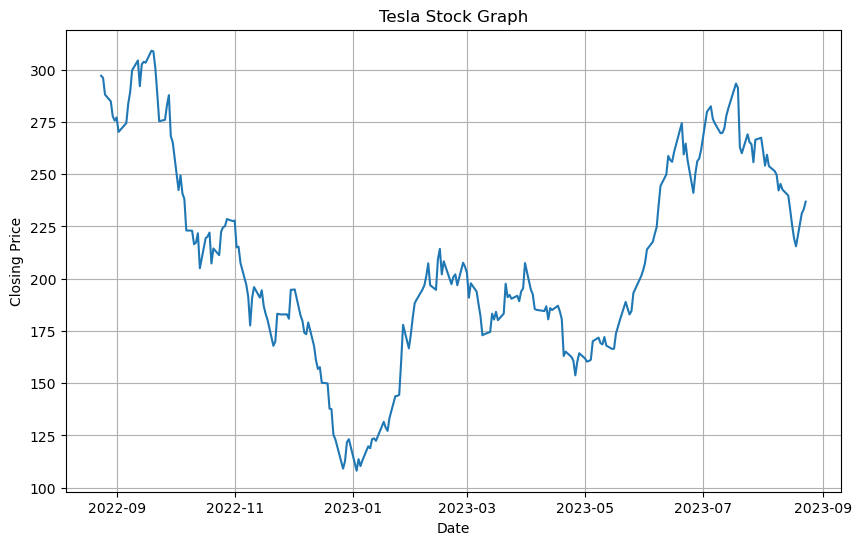

In [11]:
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'])
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Define the ticker symbol for Tesla
ticker = 'TSLA'

# Fetch the stock data using yfinance
tesla_data = yf.download(ticker, period='1y', interval='1d')

# Reset the index of the dataframe
tesla_data.reset_index(inplace=True)

# Plot the Tesla stock graph with a title
make_graph(tesla_data, 'Tesla Stock Graph')

In this code, we define the make_graph function, which takes the stock data and a title as input. The function uses the matplotlib.pyplot library to plot the closing price of the stock over time.

We then define the ticker symbol for Tesla as 'TSLA' and fetch the stock data using the yf.download() function. Next, we reset the index of the tesla_data dataframe to ensure that the 'Date' column becomes a regular column.

Finally, we call the make_graph() function, passing the tesla_data dataframe and the desired title as arguments. The function plots the closing price of Tesla stock over time and displays the graph with the specified title.

# Question 6 - Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, 

[*********************100%%**********************]  1 of 1 completed


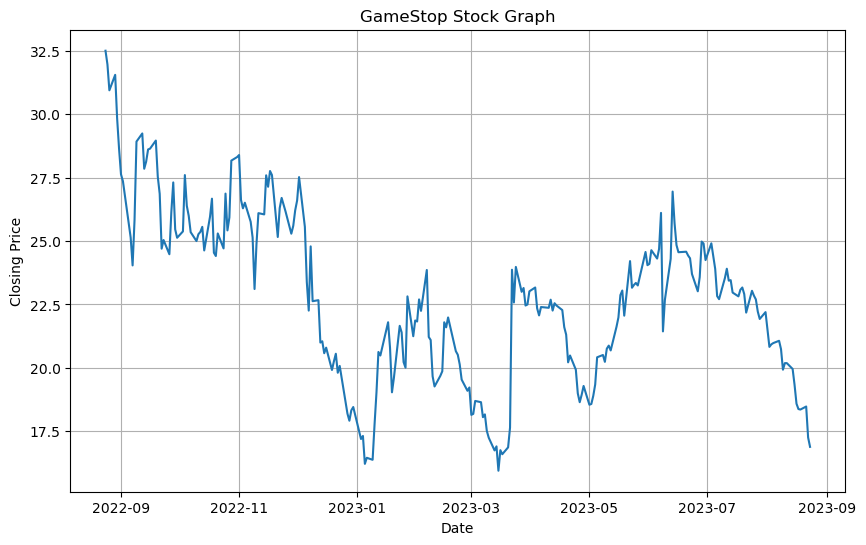

In [13]:
# Define the ticker symbol for GameStop
ticker = 'GME'

# Fetch the stock data using yfinance
gme_data = yf.download(ticker, period='1y', interval='1d')

# Reset the index of the dataframe
gme_data.reset_index(inplace=True)

# Plot the GameStop stock graph with a title
make_graph(gme_data, 'GameStop Stock Graph')

We define the ticker symbol for GameStop as 'GME' and fetch the stock data using the yf.download() function. We then reset the index of the gme_data dataframe to make sure that the 'Date' column becomes a regular column.

Finally, we call the make_graph() function, passing the gme_data dataframe and the desired title as arguments. The function plots the closing price of GameStop stock over time and displays the graph with the specified title.

# Add the GitHub link or the URL to your assignment in Watson Studio using the share notebook lab instructions.